In [2]:
import numpy as np
from matplotlib import pyplot as plt
pi = np.pi

In [12]:
# set up coords - polar in Fourier domain
fx1D = np.linspace(-10,10,100)
fy1D = np.linspace(-10,10,100)
[fx2D,fy2D] = np.meshgrid(fx1D,fy1D)
k2D = np.sqrt(fx2D**2+fy2D**2)
theta2D = np.arctan2(fy2D,fx2D)

In [24]:
# model: transfer function (eq B.4 in https://www.sciencedirect.com/science/article/pii/S2213597920300628#sec0065)

def showTFmag(w,delay,ks=k2D,thetas=theta2D):
    TF = .5*(np.exp(-1j*ks*(delay-w(thetas)))-np.exp(1j*ks*(delay-w(thetas+pi))))
    plt.imshow(np.abs(TF))
    
def showTFphase(w,delay,ks=k2D,thetas=theta2D):
    TF = .5*(np.exp(-1j*ks*(delay-w(thetas)))-np.exp(1j*ks*(delay-w(thetas+pi))))
    plt.imshow(np.angle(TF))
    
def showTFspatial(w,delay,ks=k2D,thetas=theta2D):
    TF = .5*(np.exp(-1j*ks*(delay-w(thetas)))-np.exp(1j*ks*(delay-w(thetas+pi))))
    plt.imshow(np.abs(np.fft.fftshift(np.fft.ifft2(TF))))

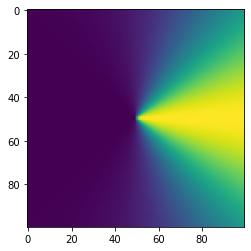

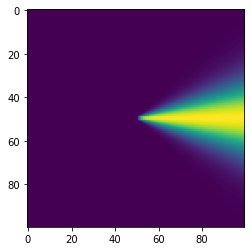

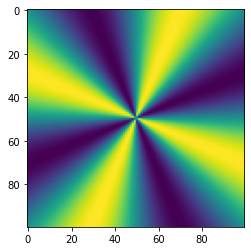

In [29]:
# made up w functions - need guidance to make these realistic

def wgausswide(theta):
    return np.exp(-theta**2)

def wgaussnarrow(theta):
    return np.exp(-theta**2/.1)

def wsin(theta):
    return np.sin(4*theta)

ws = [wgausswide,wgaussnarrow,wsin]
for w in ws:
    plt.figure()
    plt.imshow(w(theta2D))

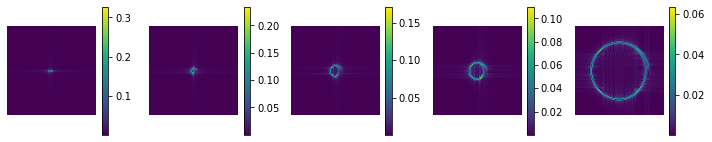

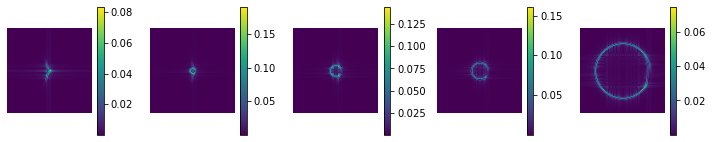

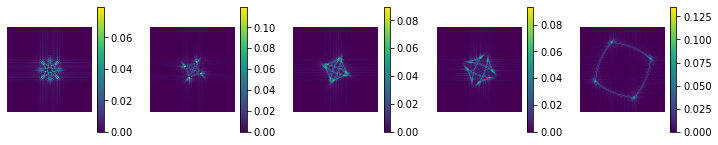

In [30]:
delays = [0,1,2,3,10]
for w in ws:
    plt.figure(figsize=(2*len(delays),4))
    for i,delay in enumerate(delays):
        plt.subplot(2,len(delays),i+1)
        showTFspatial(w,delay)
        plt.axis('off')
        plt.colorbar()
    plt.tight_layout()

In [ ]:
# SOS to w
# 512 detectors/directions
# HxWx512 data

